<a href="https://colab.research.google.com/github/DGJLv/Kepler_Law/blob/main/Copy_of_PHYS8A_KeplersLawLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simulating Universal Gravitation and Kepler's Laws

Masha's (Dr. Maria Okounkova) Python version of Dr. Hartman's "Simulating Universal Gravitation and Kepler's Laws" Lab

In [ ]:
## Imports
import matplotlib.pyplot as plt
import numpy as np
import scipy

Values for $G$, $M_e$ and $M_s$ in SI units

In [ ]:
# Gravitational constant
G = 6.67e-11
# Mass of the Earth
M_e = 5.98e24
# Mass of the setellite
M_s = 4000

Functions to take a timestep of the simulation

In [ ]:
## Functions to update acceleration, position, and velocity
def update(x_0, y_0, vx_0, vy_0, ax_0, ay_0, delta_t):
  """ Given positions x_0, y_0, velocities vx_0, vy_0,
      and accelerations ax_0, ay_0 from the previous
      timestep, as well as timestep delta_t, return updates
      positions x_1, y_1, velocities vx_1, vy_1, and
      accelerations ax_1, ay_1 """
# position
  x_1 = x_0 + vx_0 * delta_t + 0.5 * ax_0 * delta_t**2
  y_1 = y_0 + vy_0 * delta_t + 0.5 * ay_0 * delta_t**2
# acceleration (equation 8)
  ax_1 = - G * M_e * x_1 / (x_1**2 + y_1**2)**1.5
  ay_1 = - G * M_e * y_1 / (x_1**2 + y_1**2)**1.5
# velocity (equation 9)
  vx_1 = vx_0 + 0.5 * (ax_0 + ax_1)*delta_t
  vy_1 = vy_0 + 0.5 * (ay_0 + ay_1)*delta_t

  return x_1, y_1, vx_1, vy_1, ax_1, ay_1


Example simulation

Velocity:  10000
ax:  -0.0
ay:  -8.676960694738124
vxi:  7670.05824686648
T:  33769.0
a:  22586392.058318283
max R:  38392783.54819188
min R:  6780000.568444687
b:  16133911.31377989
e:  0.6998192296078692
T^2/a^3:  9.896823221136995e-14
mass calculated:  5.981211196660049e+24
percentage error:  0.02025412474997424
max Total E:  -35319142488.089935
min Total E:  -35319174041.278534
Percentage difference:  -8.933731761717258e-05 %


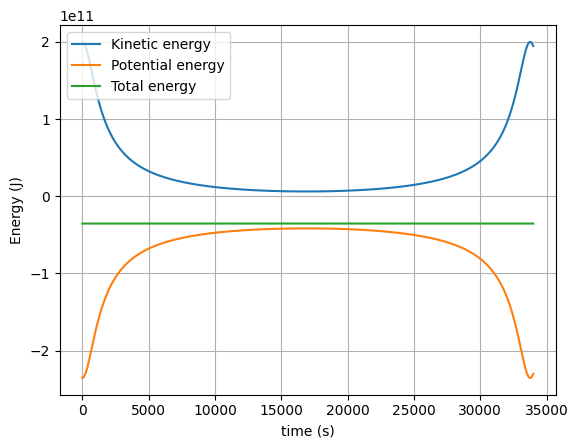

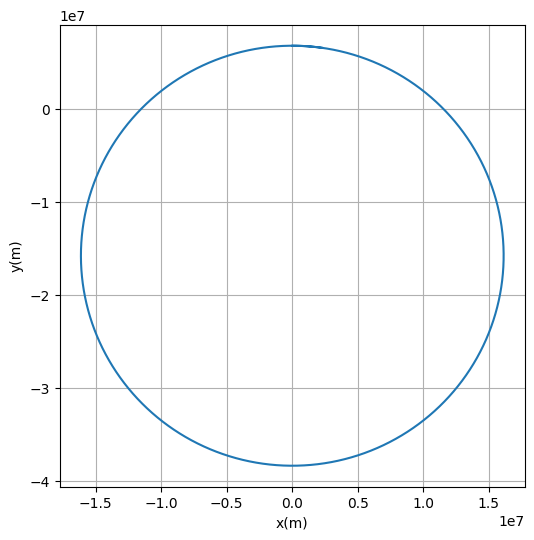

In [ ]:
## Initial conditions for position, velocity, and acceleration in SI units
# x initial position
x = 0
# y initial position
y = 410000+6.37e6
# set x velocity
vx = 10000
print("Velocity: ",vx)
# y initial velocity
vy = 0.0
# x initial acceleration
ax = -G * M_e * x / (x**2 + y**2)**1.5
# y initial acceleration
ay = -G * M_e * y / (x**2 + y**2)**1.5
# value of R
R = np.sqrt(x**2+y**2)

# print initial accelerations for x, y components
print("ax: ", ax)
print("ay: ", ay)

# initial velocity (equation 10)
vxi = np.sqrt(G*M_e/R)
print("vxi: ", vxi)

## Time-stepping parameters
steps = 34000
delta_t = 1

## Data arrays
time_array = np.zeros(steps)
x_array = np.zeros(steps)
y_array = np.zeros(steps)
vx_array = np.zeros(steps)
vy_array = np.zeros(steps)
r_array = np.zeros(steps)

## Time stepping loop
n = 0
# updating data for n steps loop
while n < steps:
  x, y, vx, vy, ax, ay = update(x, y, vx, vy, ax, ay, delta_t)
  time_array[n] = delta_t * n
  x_array[n] = x
  y_array[n] = y
  vx_array[n] = vx
  vy_array[n] = vy
  r_array[n] = np.sqrt(x**2+y**2)
  n = n + 1
y0 = 410000+6.37e6
# set T array for store time data for each step
T_array = []
# considering all y array value
for n in range(len(y_array)):
'''
set variable T as the time that y array value has less than 1 meter
difference from the initial location, but not exactly same value to avoid recording
time in 0s
'''
  if(y_array[n] <= y0 + 1) and (y_array[n] >= y0 - 1) and (y_array[n] != y0):
    T = time_array[n]
    # print the period of setellite
    print("T: ", T)
    # semi-major value
    a = ((G*M_e/(4*np.pi**2)*T**2))**(1/3)
    calca = (np.max(r_array)+np.min(r_array))/2
    print ("a: ", calca)
    # max & min R
    print("max R: ",np.max(r_array))
    print("min R: ",np.min(r_array))
    # equation 13
    b = np.sqrt(np.max(r_array)*np.min(r_array))
    print("b: ", b)
    # equation 11
    e = np.sqrt(1-((b)**2/(calca)**2))
    print("e: ", e)
    # T^2/a^3
    ratio = T**2/calca**3
    print("T^2/a^3: ", ratio)
    # average value for T^2/a^3
    t2a3Avg = 9.89566e-14
    # derived mass of the Earth
    me = (4*np.pi**2)/(G*t2a3Avg)
    print("mass calculated: ", me)
    # mass percentage error
    print("percentage error: ", np.abs((me-M_e)/M_e)*100)
    break

k_array = []
u_array = []
net_array = []
for n in range(steps):
  # equation 15
  k_array.append(1/2*M_s*(vx_array[n]**2+vy_array[n]**2))
  # equation 16
  u_array.append(-G*M_e*M_s/r_array[n])
  # total energy
  net_array.append(k_array[n]+u_array[n])

# max & min total energy
max_e = np.max(net_array)
min_e = np.min(net_array)
print("max Total E: ", max_e)
print("min Total E: ", min_e)
# % difference between max & min value of total energy
print ("Percentage difference: ", (max_e - min_e)/((max_e + min_e)/2)*100, "%")

# energy plot
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("Energy (J)")
plt.plot(time_array, k_array)
plt.plot(time_array, u_array)
plt.plot(time_array, net_array)
plt.legend(["Kinetic energy","Potential energy","Total energy"], loc = "upper left")
plt.show()


## position plot
plt.figure(figsize=(6,6))
plt.grid()
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.plot(x_array, y_array)
plt.show()






